# Online Shoppers Intention Prediction



## Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/master/online_shoppers_intention.csv")


import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4fc02a6471514223834337125950e1b3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JCwts8SxSbmOPD0T1vrK9b7XS6Hl4g6LriTHoU6hP237',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4fc02a6471514223834337125950e1b3.get_object(Bucket='mycap-donotdelete-pr-fpsfoemwz3a4dc',Key='online_shoppers_intention.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4fc02a6471514223834337125950e1b3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JCwts8SxSbmOPD0T1vrK9b7XS6Hl4g6LriTHoU6hP237',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4fc02a6471514223834337125950e1b3.get_object(Bucket='mycap-donotdelete-pr-fpsfoemwz3a4dc',Key='online_shoppers_intention.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
## Lets look at the data types for each 

In [3]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

The data types for month and Visitor type are object since they are string values. The other categorical features are int64 while the numeric features are float.

### Now we will check to see if there are any NaN or missing values. 

In [4]:
#percent missing values per columns
(df.isna().sum()/df.shape[0])*100

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

All numeric columns have 0.11 percent (14) of their values missing values. lets have a look at these values

In [5]:
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


The revenue generated for all the NaN values is Flase and most of them were in the month of march 

In [6]:
df= df.dropna()

In [7]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

lets set the dtype of categorical columns to pandas category so that we can run the respective descriptive statistics 

In [9]:
cat_cols = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
numeric_cols = list(set(df.columns)-set(cat_cols+['Month']))
print(numeric_cols)
cat_dtype = pd.api.types.CategoricalDtype(categories=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],
                                          ordered=True)#ordered dtype for month
print(cat_dtype)

['ExitRates', 'Informational_Duration', 'Informational', 'ProductRelated_Duration', 'Administrative', 'BounceRates', 'Administrative_Duration', 'SpecialDay', 'PageValues', 'ProductRelated']
category


In [14]:
df[cat_cols]= df[cat_cols].astype('category')
df[['Administrative','Informational','ProductRelated']]=df[['Administrative','Informational','ProductRelated']].astype('int')
df['Month']=df['Month'].astype(cat_dtype)
cat_cols+=['Month']

In [15]:
df[cat_cols].describe()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month
count,12316,12316,12316,12316,12316,12316,12316,12316
unique,8,13,9,20,3,2,2,10
top,2,2,1,2,Returning_Visitor,False,False,May
freq,6593,7951,4774,3909,10537,9451,10408,3363


In [16]:
df[numeric_cols].describe()

,ExitRates,Informational_Duration,ProductRelated_Duration,Administrative,SpecialDay,Administrative_Duration,ProductRelated,Informational,BounceRates,PageValues
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.043003,34.506387,1196.037057,2.317798,0.061497,80.906176,31.763884,0.503979,0.022152,5.895952
std,0.048527,140.825479,1914.372511,3.322754,0.199020,176.860432,44.490339,1.270701,0.048427,18.577926
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014286,0.000000,185.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
50%,0.025124,0.000000,599.766190,1.000000,0.000000,8.000000,18.000000,0.000000,0.003119,0.000000
75%,0.050000,0.000000,1466.479902,4.000000,0.000000,93.500000,38.000000,0.000000,0.016684,0.000000
max,0.200000,2549.375000,63973.522230,27.000000,1.000000,3398.750000,705.000000,24.000000,0.200000,361.763742


Above we can se that the minimum value of duration is -1 which is not possible it is clipped.

In [10]:
df[numeric_cols] = df[numeric_cols].clip(lower=0)

In [11]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64


## Univariate analysis

Lets look at the distributions of categorical variables.

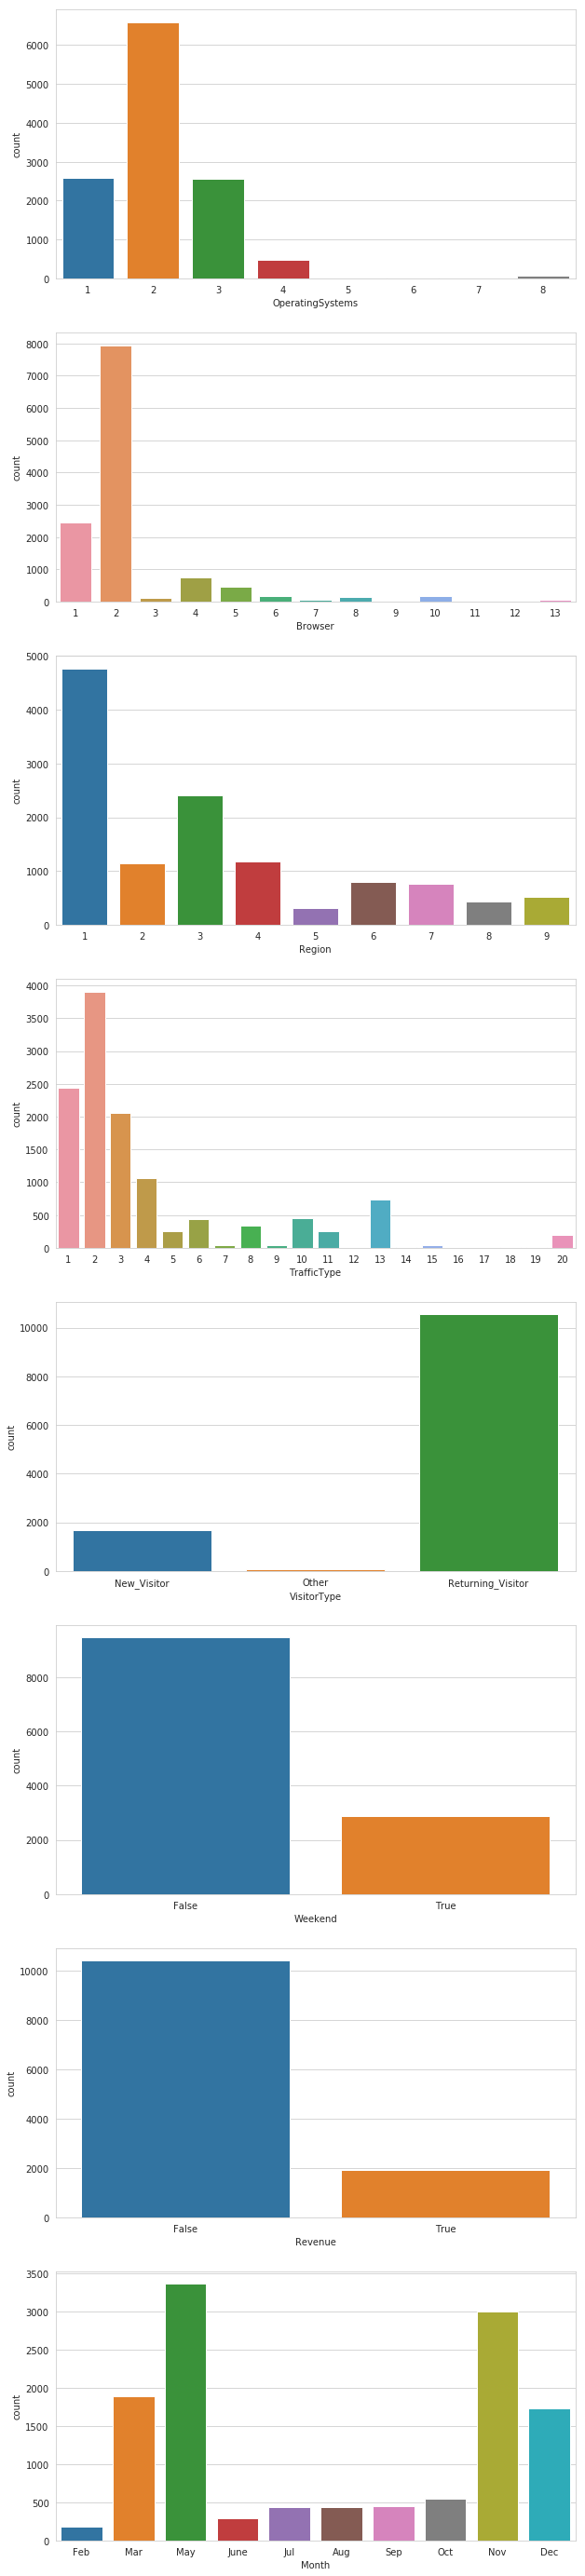

In [19]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
        sns.countplot(x=col,data=df[cat_cols],ax=ax[idx])

From the above plots it is clear that 
1. The target variable Revenue is imbalanced.
2. Data was not collected in the months of jan and april
3. The Data collected is not uniformly dostributed among the months and Region
4. OperatingSystem, Browser, TrafficType apperas to have some categories missing

In [12]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

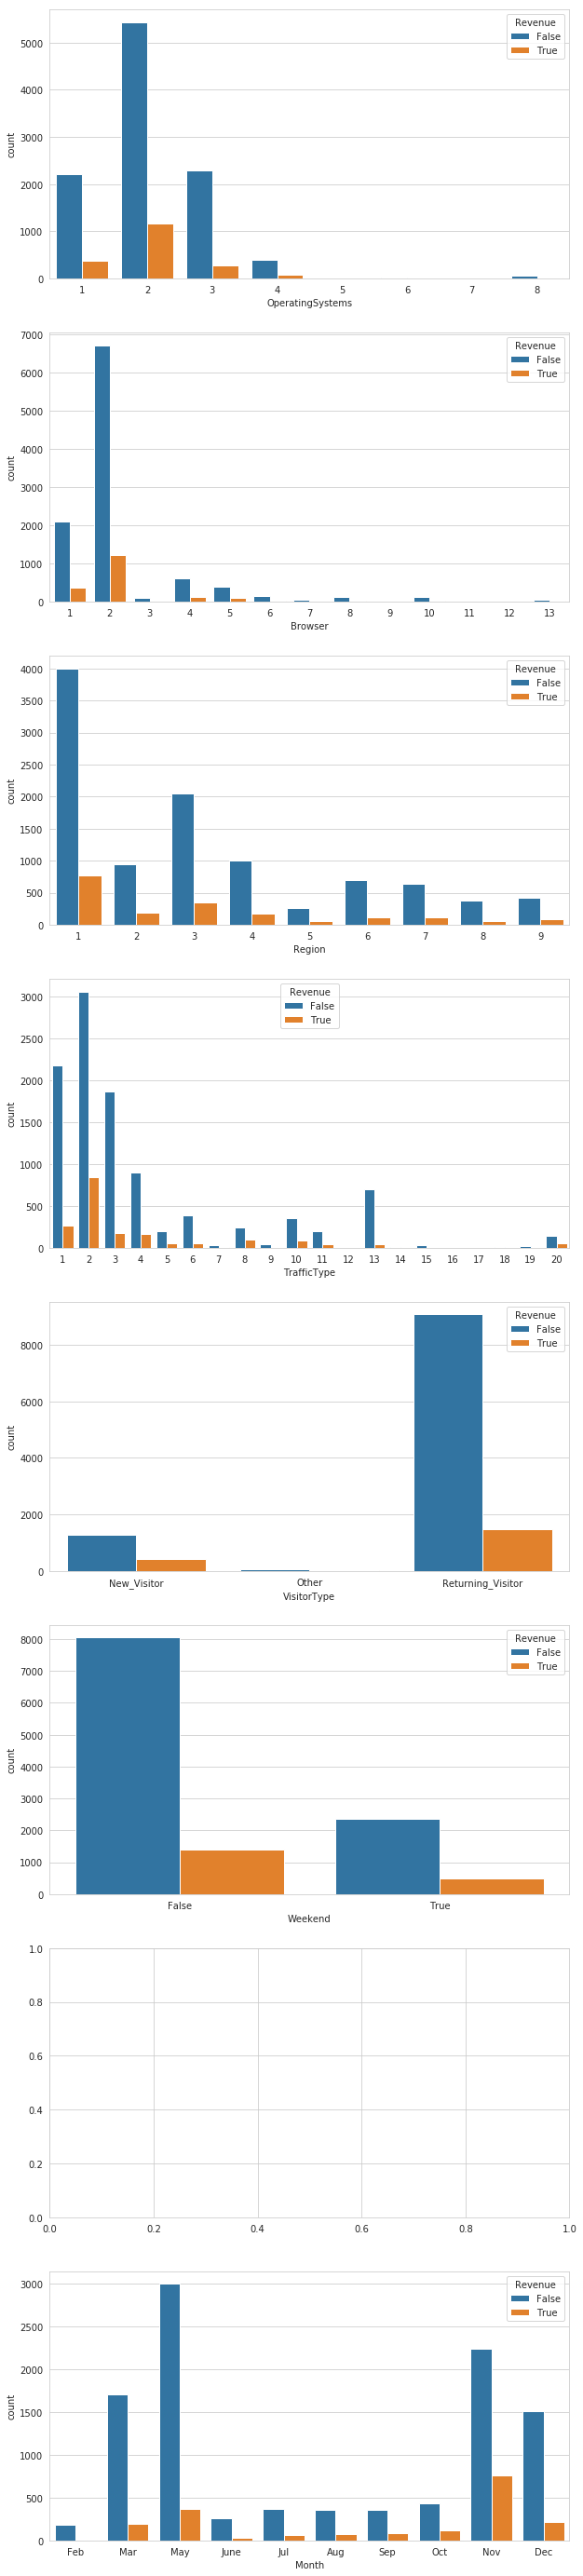

In [21]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
    if col!='Revenue':
        sns.countplot(x=col,data=df[cat_cols],hue='Revenue',ax=ax[idx])

Distributions of numerical variables

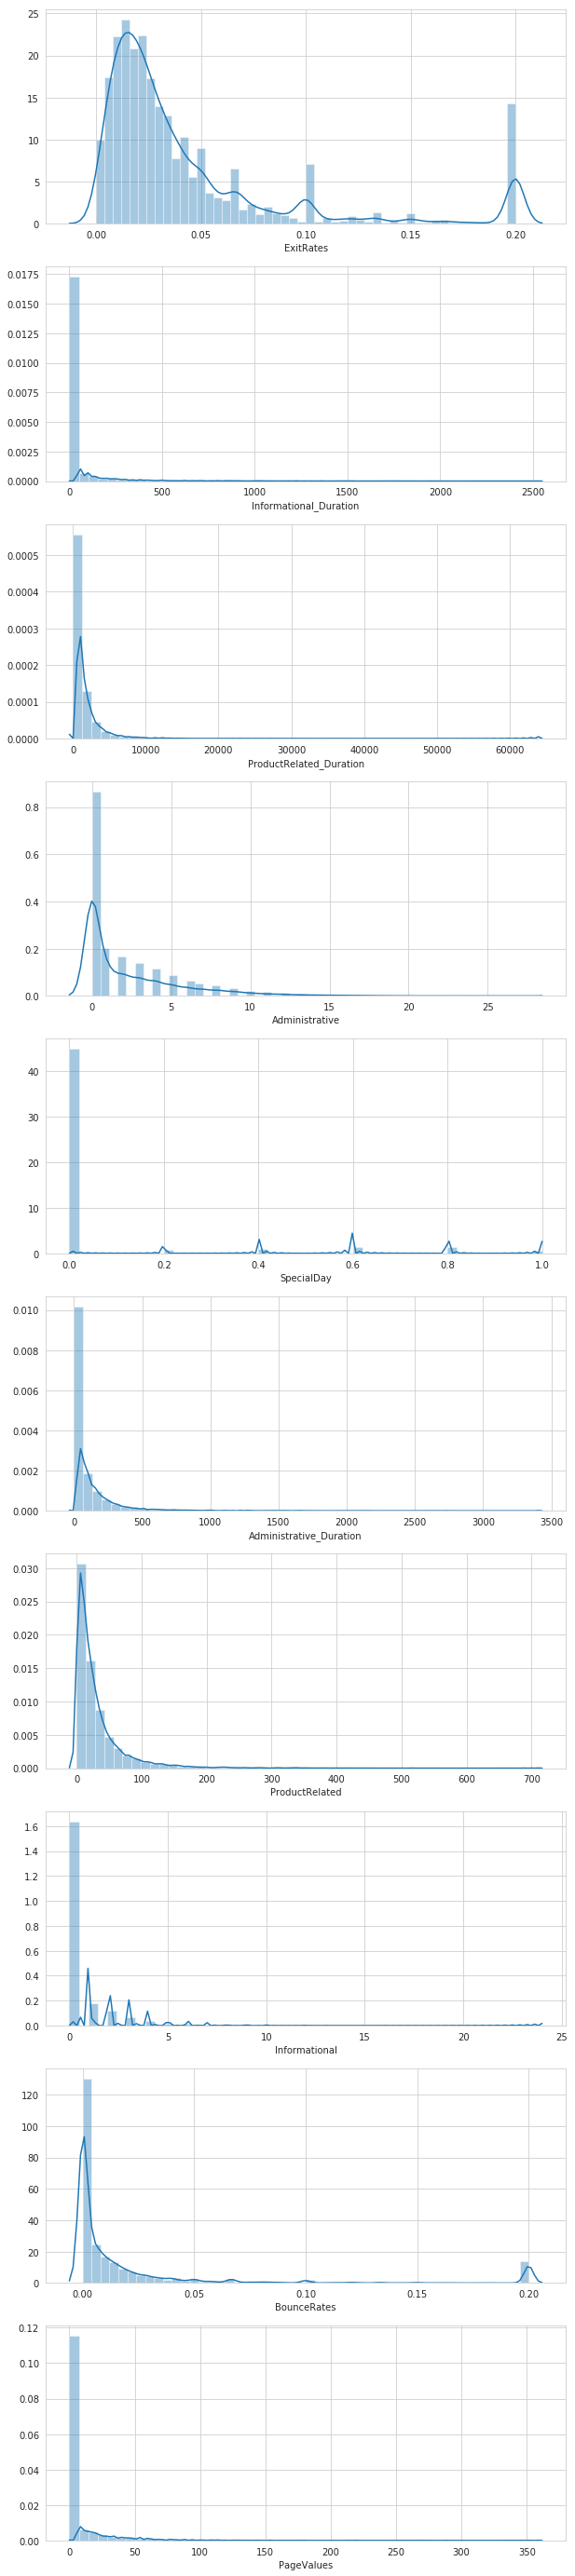

In [22]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(df[col],ax=ax[idx])

In [23]:
df[numeric_cols].min()

ExitRates                  0.0
Informational_Duration     0.0
ProductRelated_Duration    0.0
Administrative             0.0
SpecialDay                 0.0
Administrative_Duration    0.0
ProductRelated             0.0
Informational              0.0
BounceRates                0.0
PageValues                 0.0
dtype: float64

## Box plot for outlier detection

Since the distribution plots are skewed the enhanced boxplot are are used to vizualize conditional distribution.
the enhanced box plot can br use to vizualize more quantiles

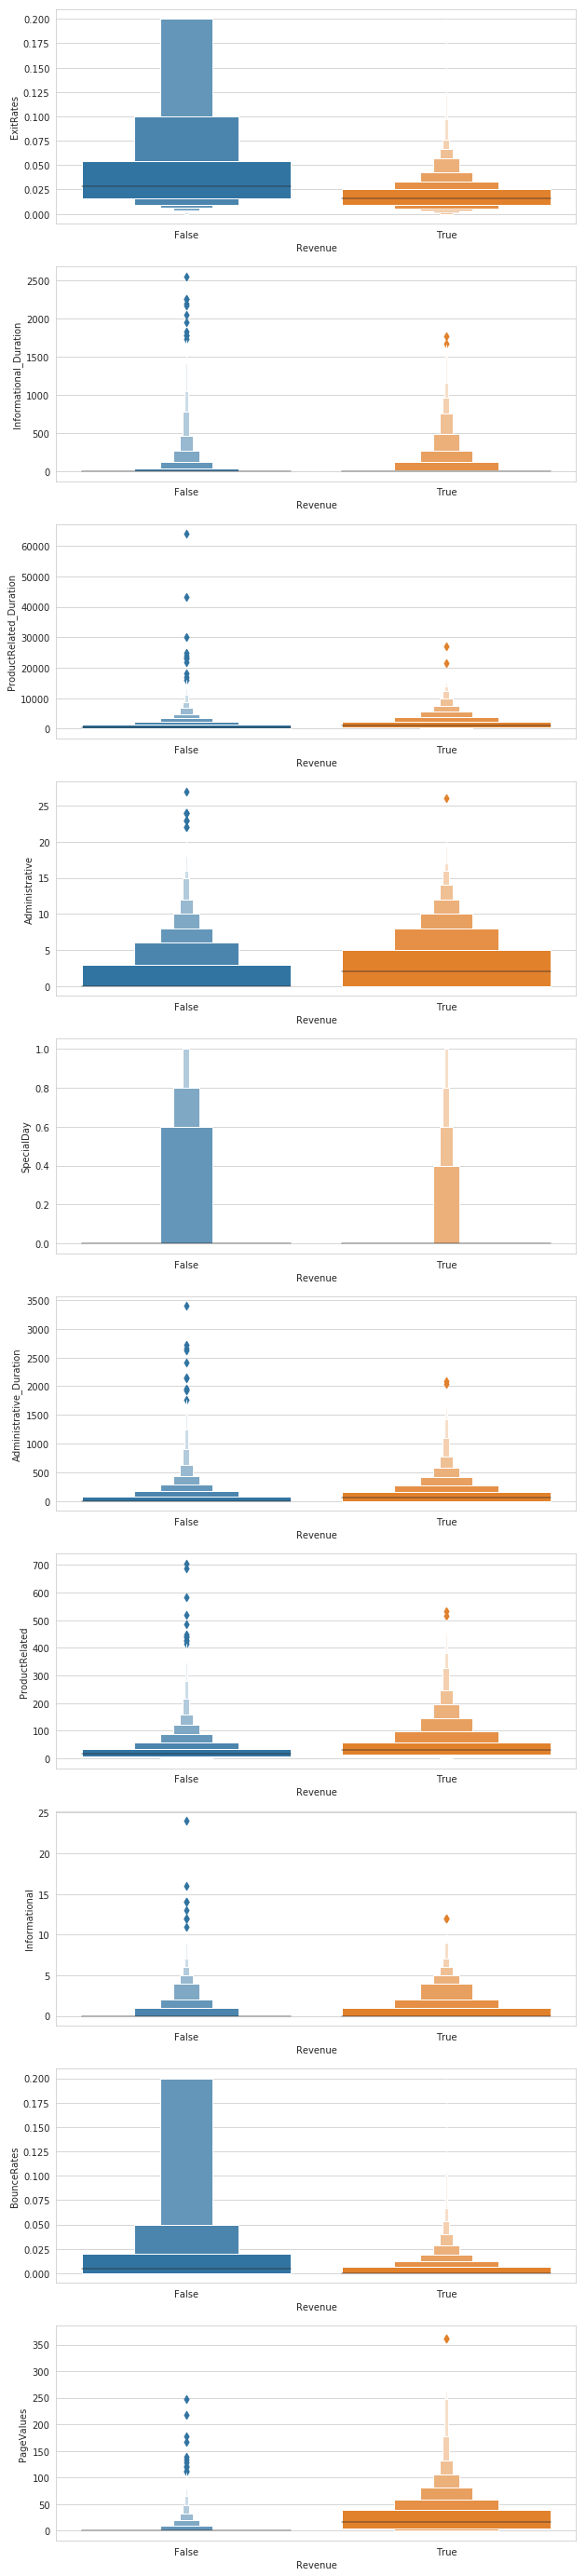

In [24]:
df[cat_cols] =df[cat_cols].astype('category') 
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.boxenplot(y=col,x='Revenue',data=df[numeric_cols + ['Revenue']],ax=ax[idx])

Now the outliers for columns are clipped

In [13]:
df['Administrative']=df['Administrative'].clip(upper=20)
df['PageValues']=df['PageValues'].clip(upper=250)
df['Administrative_Duration']=df['Administrative_Duration'].clip(upper=1500)
df['Informational']=df['Informational'].clip(upper=10)
df['ProductRelated_Duration']=df['ProductRelated_Duration'].clip(upper=20000)
df['ProductRelated']=df['ProductRelated'].clip(upper=600)
df['Informational_Duration']=df['Informational_Duration'].clip(upper=1500)

To fix the skew various transforms can be applied. To see if the transformation is useful multivariate analysis for the transfomration can be compared with that of the original dataset. 

In [14]:
from sklearn.preprocessing import PowerTransformer

In [24]:
pt = PowerTransformer(standardize=True)
transformed_df = pd.DataFrame(pt.fit_transform(df[numeric_cols]),columns=numeric_cols)
# till here 10 columns for transformed_df    refer 2 cells above for numneric_cols
transformed_df[cat_cols]=df[cat_cols]
# till here 16 columns i.e the cat_cols are also appended
transformed_df=transformed_df.dropna()
print("full",transformed_df.shape)
transformed_0 = transformed_df[transformed_df['Revenue']==0]
print("transformed_0:",transformed_0.shape)
transformed_1 = transformed_df[transformed_df['Revenue']==1]
print("transformed_1:",transformed_1.shape)
transformed_df.isna().sum()

full (12330, 17)
transformed_0: (10422, 17)
transformed_1: (1908, 17)


ExitRates                  0
Informational_Duration     0
Informational              0
ProductRelated_Duration    0
Administrative             0
BounceRates                0
Administrative_Duration    0
SpecialDay                 0
PageValues                 0
ProductRelated             0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Below we can see the change in distibution when yeo-jhonson transformations was applied

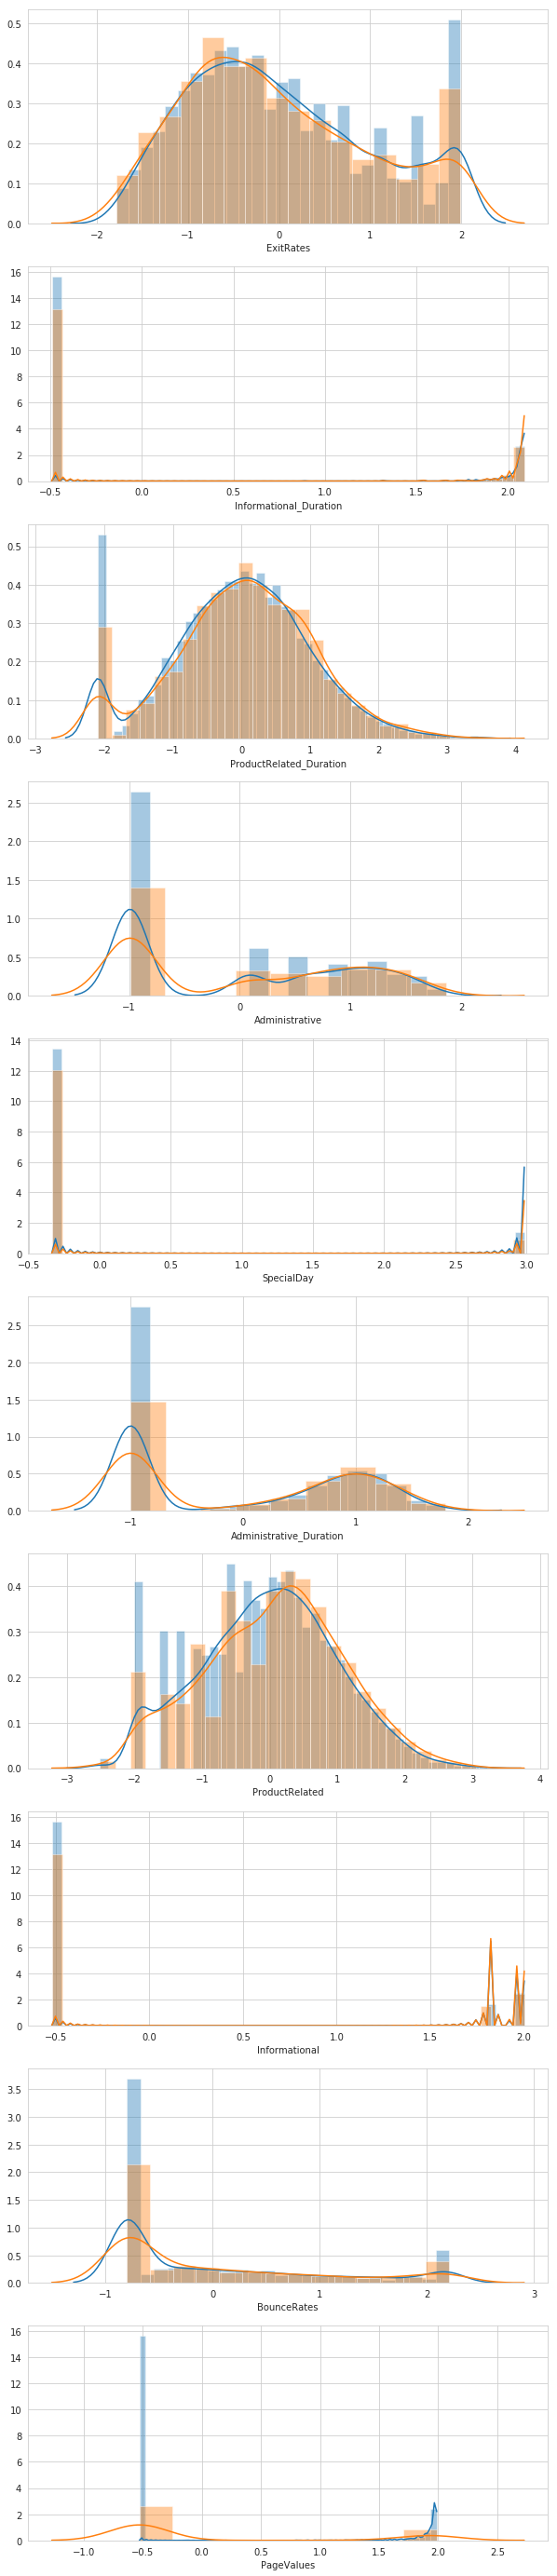

In [28]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(transformed_0[col],ax=ax[idx])
    sns.distplot(transformed_1[col],ax=ax[idx])

## Multivariate Analysis

Scatter plots and pearsons correltations coefficient are used to find if numeric features are realted. 

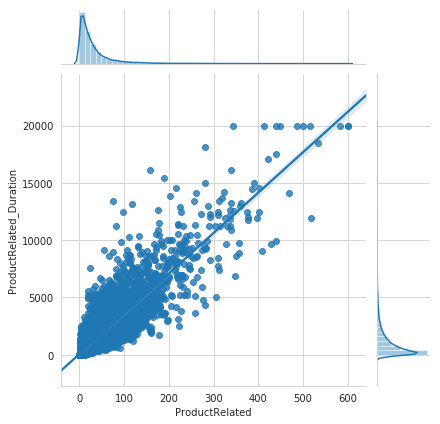

In [29]:
sns.jointplot(x="ProductRelated" ,y="ProductRelated_Duration",data=df[numeric_cols],kind="reg")

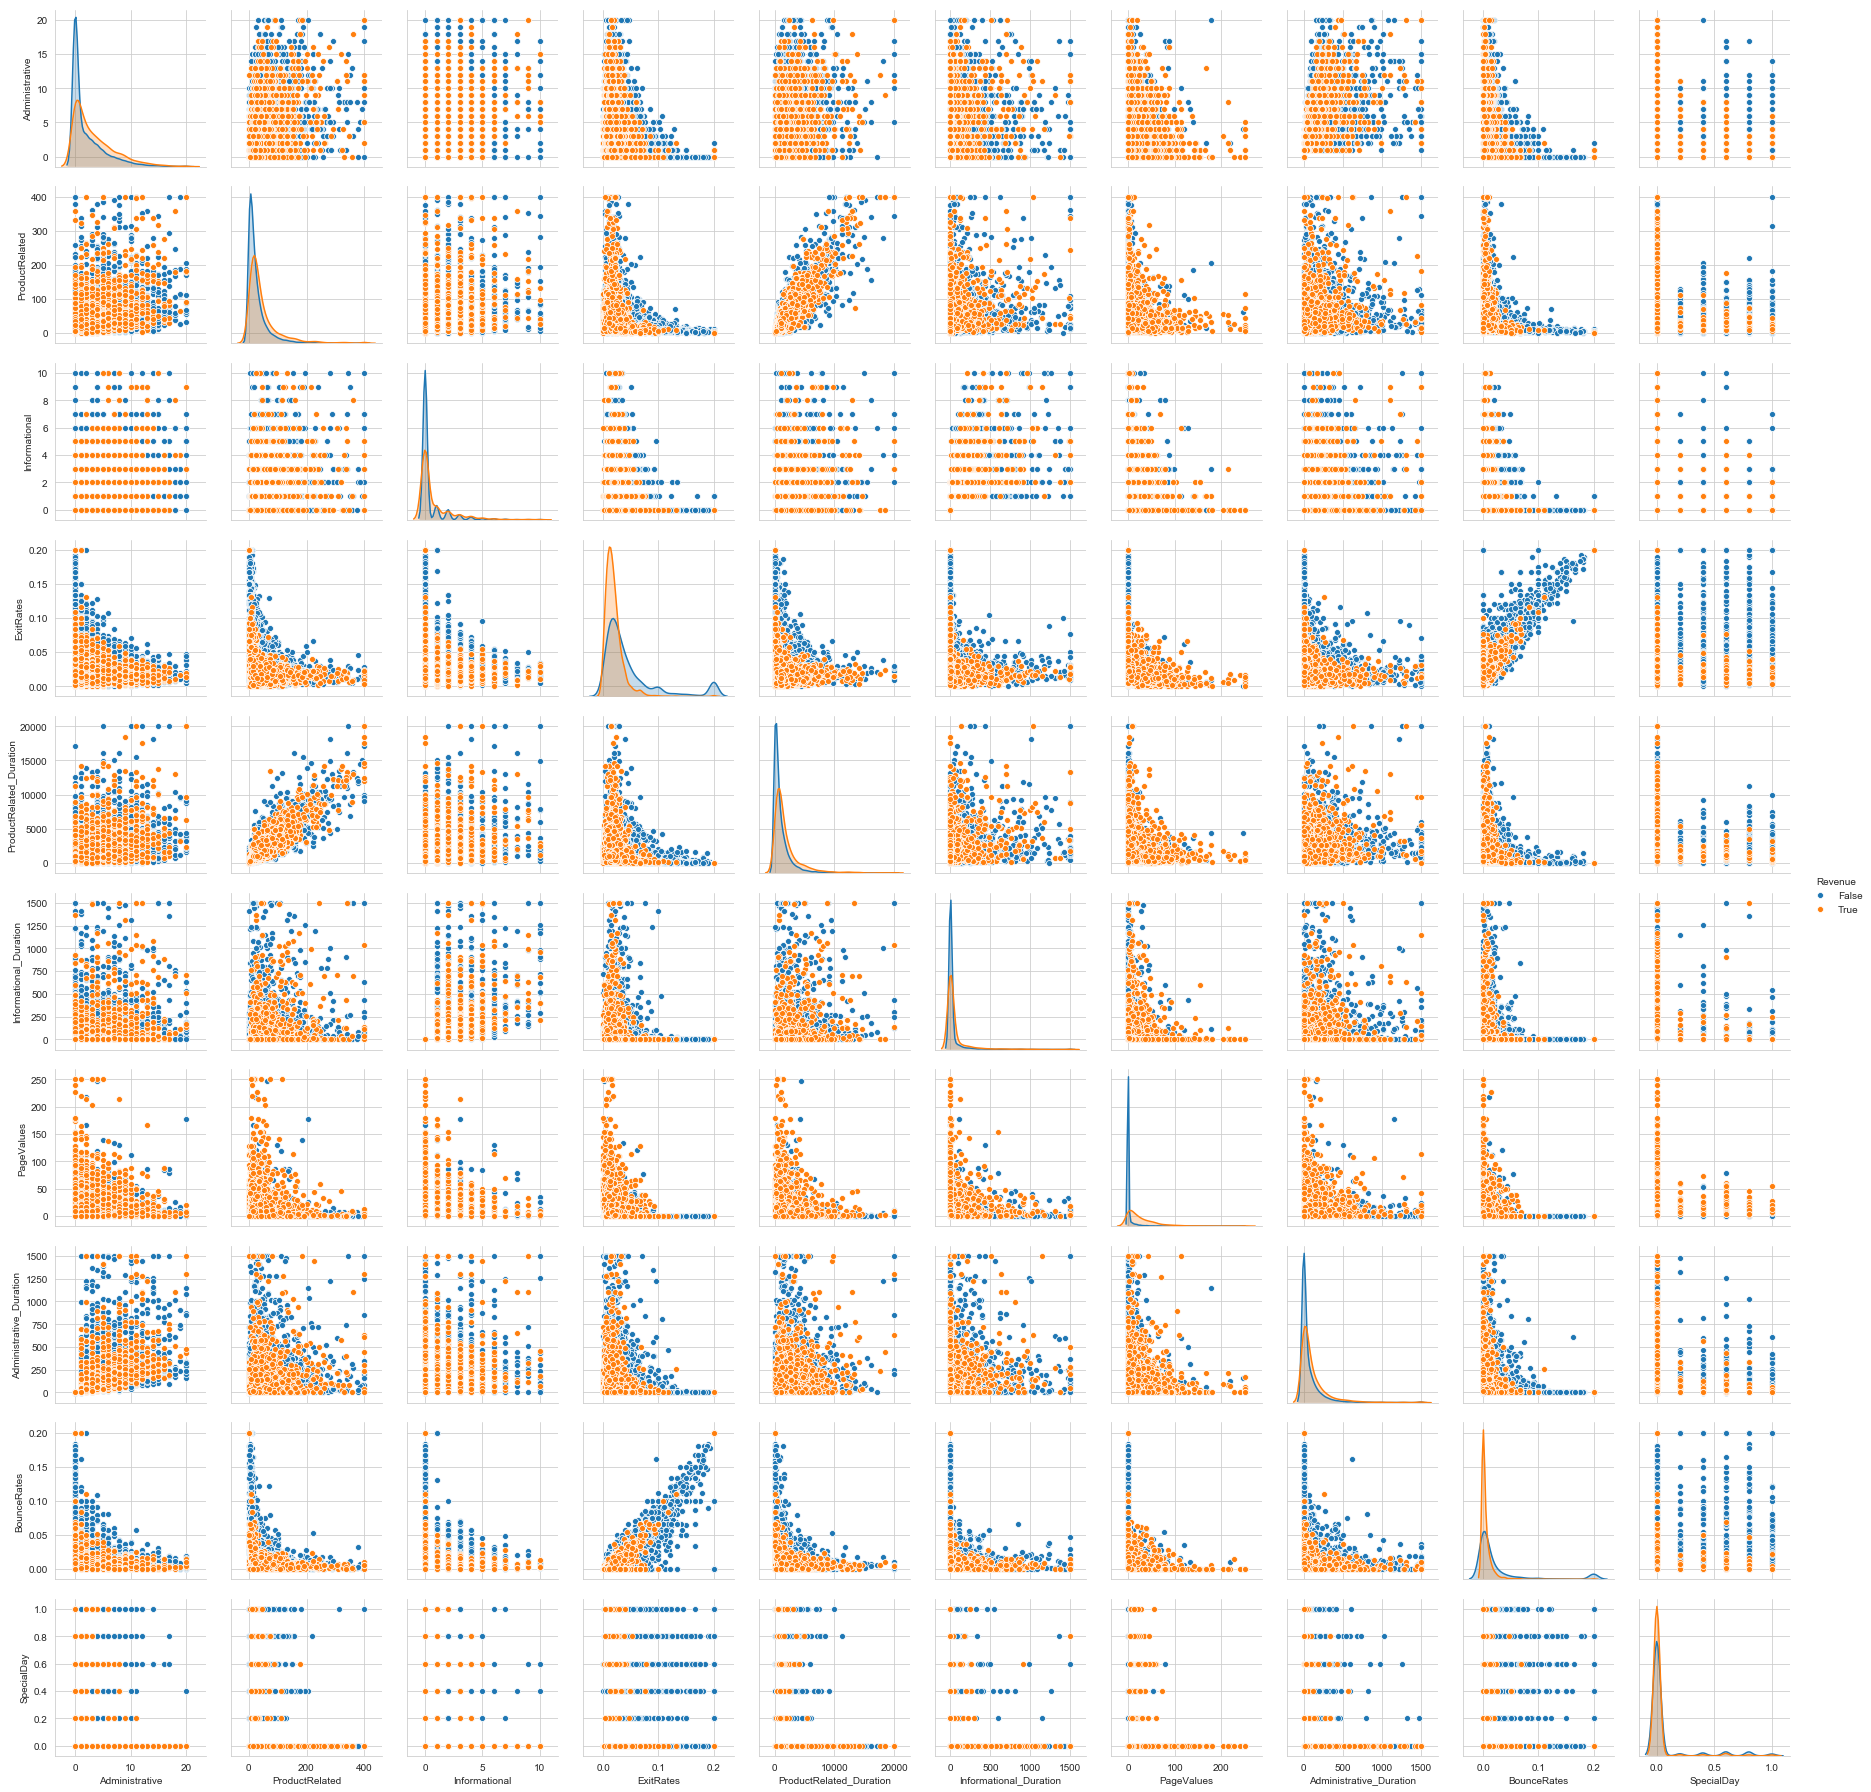

In [19]:
#pairplot for untransfromed dataset
sns.pairplot(df,vars=numeric_cols,hue='Revenue')#scatter plot between pairs of numeric columns

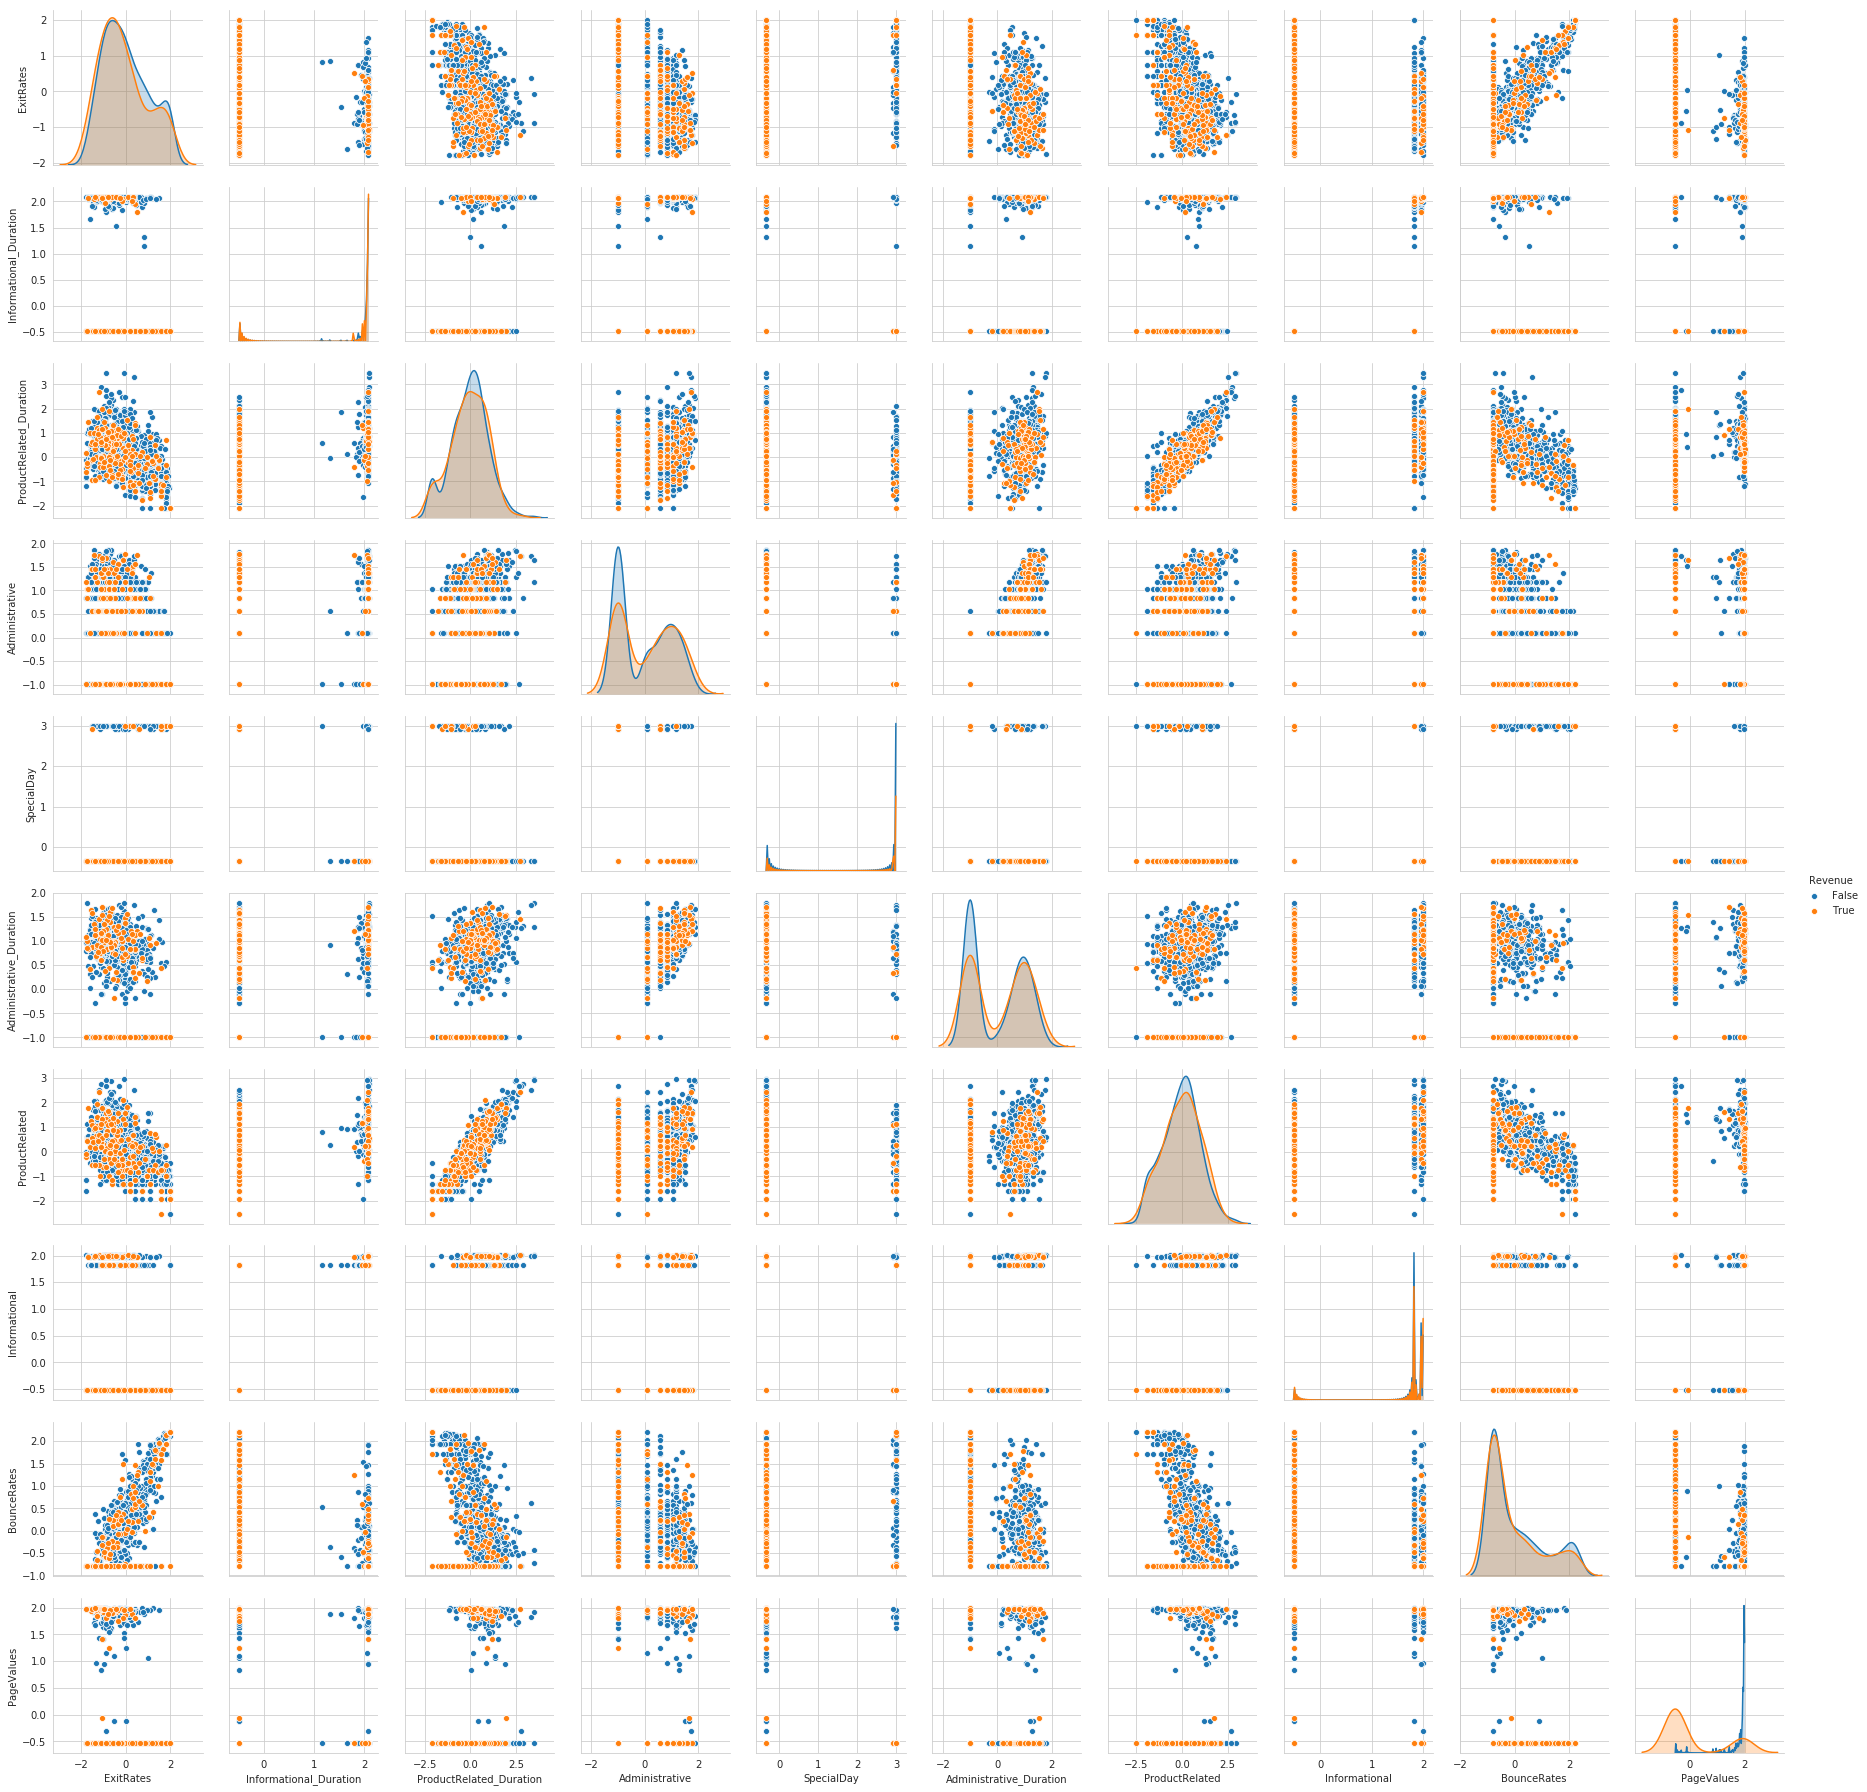

In [30]:
#pairplot for transfromed dataset
sns.pairplot(transformed_df.sample(frac=0.1),vars=numeric_cols,hue='Revenue')

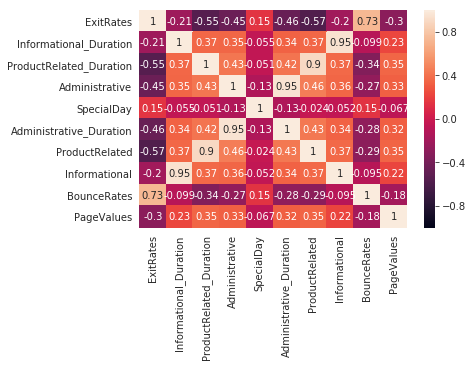

In [31]:
#heat map for untransformed dataset
sns.heatmap(transformed_df[numeric_cols].corr(),annot=True,vmin=-1,vmax=1)

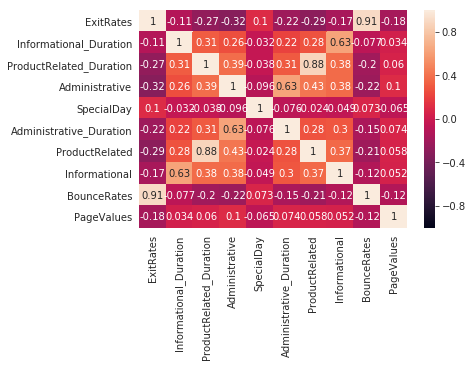

In [32]:
#Heat map for transformed dataset
sns.heatmap(df[numeric_cols].corr(),annot=True,vmin=-1,vmax=1)

For relation between categorical and numerical features analysis of variance test is used which rejects the null hypothesis. 

In [33]:
from scipy.stats import f_oneway
for col in numeric_cols:
    print(col,f_oneway(df[col],df['Revenue']))


ExitRates F_onewayResult(statistic=1157.4051646289086, pvalue=6.010190087008823e-248)
Informational_Duration F_onewayResult(statistic=789.6001875807722, pvalue=4.90949434563493e-171)
ProductRelated_Duration F_onewayResult(statistic=5543.960716979227, pvalue=0.0)
Administrative F_onewayResult(statistic=5210.31019513269, pvalue=0.0)
SpecialDay F_onewayResult(statistic=630.3098595619027, pvalue=2.2852092732324047e-137)
Administrative_Duration F_onewayResult(statistic=2843.475576461068, pvalue=0.0)
ProductRelated F_onewayResult(statistic=6270.749778903707, pvalue=0.0)
Informational F_onewayResult(statistic=888.028198982605, pvalue=9.93026727052001e-192)
BounceRates F_onewayResult(statistic=1628.938326563153, pvalue=0.0)
PageValues F_onewayResult(statistic=1216.5860735007025, pvalue=3.224422043821183e-260)


## Dataset Summary

The dataset contains 8 categorical and 10 numeric features and one Target class.
All of these 8 categorical features are nominal and 2 of them are strings which need to be encoded.

Target class is imbalanced. Techniques like oversampling, undersampling or smoting can be used along with Stratified Cross Validation for developing a robust model

The numeric values had a few outliers. The distribution of numeric values are highly skewed. The feature Exit rate is bimodal.
there is a high correlation between productrelated and productrelated_duration (0.88) and Exit rate and bounce rate(0.91).
An analysis of variance test suggests that numeric columns are correlated with the target variable.

pairwise Scatter plot suggest non-linear relation ship.